In [7]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

- Kernalized support vector machines are an extension that allows for more complex models that are not defined simply by hyperplane.

## Linear Model and Non-linear Model
- A linear model for classification can only separate points using a line.
- A linear model will not be able to do a very good job on following dataset.

Text(0, 0.5, 'Feature 1')

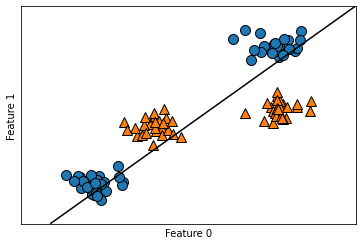

In [8]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC 
X, y = make_blobs(centers=4, random_state=8) 
y=y%2
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- Thus, let's expand the set of input features.
- Adding feature1**2. Make 3 dimensional graph.
- (feature0, feature1, feature1**2) 

Text(0.5, 0, 'feature1 ** 2')

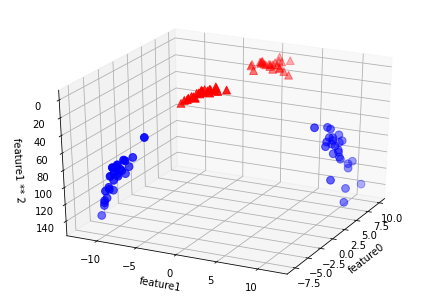

In [10]:
 # add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
    # plot first all the points with y == 0, then all with y == 1
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60) 
ax.set_xlabel("feature0")
ax.set_ylabel("feature1") 
ax.set_zlabel("feature1 ** 2")

- Nom we can separate the two classes using a linear model, a plane in three dimensions.

Text(0.5, 0, 'feature0 ** 2')

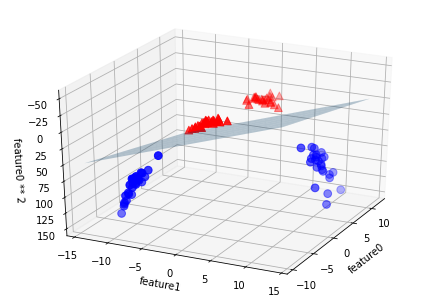

In [11]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
    # show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50) 
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] 
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0") 
ax.set_ylabel("feature1") 
ax.set_zlabel("feature0 ** 2")

- As a function of the orinal features, linear SVM is not linear anymore.
- See following graph.

Text(0, 0.5, 'Feature 1')

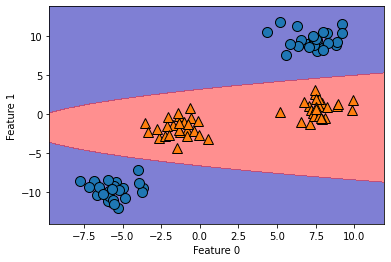

In [13]:
ZZ=YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

## Kernel Trick
- Often we don't know which features to add, and adding many features might make computation very expensive.
- Kernel Trick, directly computing the distance of the data points for the expanded feature representation, without ever actually computing the expansion.
    - Gaussian Kernel(RBF)
    - Polynomial Kernel

## Support Vector Machine
- SVM learns how important each of the training data points is to represent the decision boundary.
- The training points that lie on the border between the classes are called Support Vectors.
- A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training.

## Tuning SVM Parameter
- gamma: controls the width of the Gaussian kernel. scale of what it means for points to be close together.
- C: regularization parameter. 
- Check following graph how gamma, C affect.

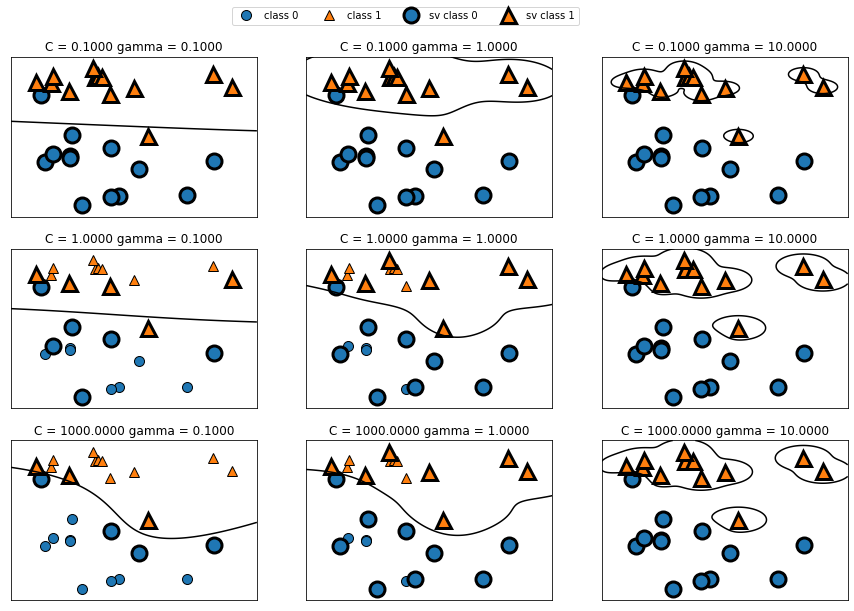

In [16]:
from sklearn.svm import SVC
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

## Example
- breast cancer data

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
svc = SVC() 
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.90
Accuracy on test set: 0.94


- It looks okay but we can make it better to pre-processing the data.
- In SVM, all the features to vary on a similar scale.

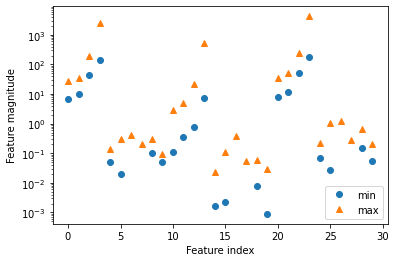

In [24]:
plt.plot(X_train.min(axis=0), 'o', label="min") 
plt.plot(X_train.max(axis=0), '^', label="max") 
plt.legend(loc=4)
plt.xlabel("Feature index") 
plt.ylabel("Feature magnitude") 
plt.yscale("log")

## Preprocessing data for SVMs.
- MinMaxScalar (Chapter 3)
- StandardScaler (Chapter 3)
- Use it by hand now.

In [25]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training 
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0))) 
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [28]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC() 
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


- It works well.

## Parameters
- C: increase value more complex model.
- gamma: increase value more complex model.

## Strengths, Weaknesses
- Even if the data has only a few features, SVMs allow for complex decision boundaries.
- Challenging in runtime and memory usage for big size samples.
- Careful prepocessing of the data and tuning of the parameters.
- Hard to inspect.